Data Link: https://drive.google.com/file/d/183FL11NrrDNz7Jj8JwWjkYoDzi3AMF4N/view?usp=drivesdk

In [162]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_tripdata.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5515094 entries, 0 to 5515093
Data columns (total 16 columns):
ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
day_week_start        float64
duration              float64
distance              float64
dtypes: float64(7), object(9)
memory usage: 673.2+ MB


In [4]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,day_week_start,duration,distance
count,5.515093e+06,5.515093e+06,5.515093e+06,5.515093e+06,5.515093e+06,5.515093e+06,5.515093e+06
mean,4.190315e+01,-8.764471e+01,4.185652e+01,-8.754684e+01,4.118620e+00,5.689855e+04,2.214353e+04
std,4.340901e-02,2.572918e-02,1.402031e+00,2.931182e+00,2.078758e+00,1.565186e+07,1.950866e+04
min,4.164000e+01,-8.787000e+01,0.000000e+00,-8.807000e+01,1.000000e+00,-9.004100e+07,-1.000000e+00
25%,4.188210e+01,-8.765875e+01,4.188213e+01,-8.765888e+01,2.000000e+00,7.970000e+02,9.071290e+03
50%,4.189888e+01,-8.764109e+01,4.189897e+01,-8.764120e+01,4.000000e+00,1.637000e+03,1.710205e+04
75%,4.192914e+01,-8.762772e+01,4.192952e+01,-8.762773e+01,6.000000e+00,5.390000e+03,3.023253e+04
max,4.208000e+01,-8.752000e+01,4.216000e+01,0.000000e+00,7.000000e+00,8.875942e+09,4.494231e+05


In [5]:
df.isna().sum()

ride_id                    0
rideable_type              1
started_at                 1
ended_at                   1
start_station_name    282069
start_station_id      282695
end_station_name      315999
end_station_id        316460
start_lat                  1
start_lng                  1
end_lat                    1
end_lng                    1
member_casual              1
day_week_start             1
duration                   1
distance                   1
dtype: int64

In [6]:
df.dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,41.936688,-87.636829,41.903450,-87.667747,member,4.0,3527.0,45394.79
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35


In [7]:
df.shape

(5515094, 16)

In [8]:
df = df.sample(n=10000)

In [9]:
df.to_csv('final_tripdata_new.csv')

In [10]:
df['started_at']= pd.to_datetime(df['started_at'])

In [11]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4993971 to 4405949
Data columns (total 16 columns):
ride_id               10000 non-null object
rideable_type         10000 non-null object
started_at            10000 non-null datetime64[ns]
ended_at              10000 non-null datetime64[ns]
start_station_name    9503 non-null object
start_station_id      9501 non-null object
end_station_name      9452 non-null object
end_station_id        9450 non-null object
start_lat             10000 non-null float64
start_lng             10000 non-null float64
end_lat               10000 non-null float64
end_lng               10000 non-null float64
member_casual         10000 non-null object
day_week_start        10000 non-null float64
duration              10000 non-null float64
distance              10000 non-null float64
dtypes: datetime64[ns](2), float64(7), object(7)
memory usage: 1.3+ MB


In [119]:
df['ride_length'] = df['ended_at'] - df['started_at']

In [120]:
df['ride_length_in_secounds'] = (pd.to_datetime(df['ride_length'], unit='ns', ).values.astype(np.int64) / 1000000000)
df['ride_length_in_secounds'] = np.where(df['ride_length_in_secounds']<0 ,np.nan,df['ride_length_in_secounds'])

In [121]:
#monday = 1 , sunday = 7
df['day_of_week'] = df['started_at'].dt.dayofweek

In [122]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance,day_of_week,ride_length,ride_length_in_secounds
4993971,E7CC3B9C2497863F,docked_bike,2020-08-13 13:17:28,2020-08-13 13:55:29,Wells St & Evergreen Ave,291,Paulina St & 18th St,205,41.906724,-87.634830,41.857901,-87.668745,member,5.0,3801.0,59446.72,3,00:38:01,2281.0
2539858,75F3F6997F82F01C,docked_bike,2020-10-09 12:26:49,2020-10-09 12:47:34,Streeter Dr & Grand Ave,35,Streeter Dr & Grand Ave,35,41.892278,-87.612043,41.892278,-87.612043,casual,6.0,2085.0,0.00,4,00:20:45,1245.0
1084867,325DAA770EDE57ED,electric_bike,2020-11-06 17:35:06,2020-11-06 17:46:46,Sedgwick St & North Ave,118,Damen Ave & Pierce Ave,69,41.911304,-87.638627,41.909463,-87.677480,casual,6.0,1140.0,38895.91,4,00:11:40,700.0
5202426,F17EA7F23A221021,electric_bike,2021-06-15 00:28:30,2021-06-15 01:00:47,Desplaines St & Randolph St,15535,Kedzie Ave & Bryn Mawr Ave,KA1504000167,41.884528,-87.644460,41.982302,-87.708913,member,3.0,7217.0,117106.31,1,00:32:17,1937.0
2241145,68163A1203766B61,classic_bike,2021-05-30 13:36:56,2021-05-30 13:43:25,Woodlawn Ave & 55th St,TA1307000164,Blackstone Ave & Hyde Park Blvd,13398,41.795264,-87.596471,41.802562,-87.590368,member,1.0,669.0,9513.54,6,00:06:29,389.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9228 entries, 4993971 to 4405949
Data columns (total 19 columns):
ride_id                    9228 non-null object
rideable_type              9228 non-null object
started_at                 9228 non-null datetime64[ns]
ended_at                   9228 non-null datetime64[ns]
start_station_name         9228 non-null object
start_station_id           9228 non-null object
end_station_name           9228 non-null object
end_station_id             9228 non-null object
start_lat                  9228 non-null float64
start_lng                  9228 non-null float64
end_lat                    9228 non-null float64
end_lng                    9228 non-null float64
member_casual              9228 non-null category
day_week_start             9228 non-null float64
duration                   9228 non-null float64
distance                   9228 non-null float64
day_of_week                9228 non-null int64
ride_length                9228 non-null tim

In [124]:
df.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name          0
start_station_id            0
end_station_name            0
end_station_id              0
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
day_week_start              0
duration                    0
distance                    0
day_of_week                 0
ride_length                 0
ride_length_in_secounds    19
dtype: int64

In [125]:
df = df.dropna()

In [126]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name         0
start_station_id           0
end_station_name           0
end_station_id             0
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
day_week_start             0
duration                   0
distance                   0
day_of_week                0
ride_length                0
ride_length_in_secounds    0
dtype: int64

In [182]:
df['member_casual'] = df['member_casual'].astype('category')

In [184]:
df['day_of_week'] = df['day_of_week'].astype('category')

In [146]:
df['rideable_type'] = df['rideable_type'].astype('category')

# How do annual members and casual riders use Cyclistic bikes differently

In [129]:
member_casual_count=df['member_casual'].value_counts()

In [130]:
member_casual_counts = pd.DataFrame(member_casual_count)

In [131]:
member_casual_counts

,member_casual
member,5591
casual,3618


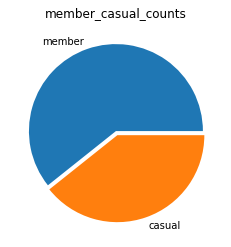

In [132]:
plt.pie(member_casual_counts.member_casual ,labels = member_casual_counts.index  , explode=[0,0.05])
plt.title('member_casual_counts')
plt.show()

In [133]:
member_casual_average_ride_length = df.groupby('member_casual')['ride_length_in_secounds'].mean()

In [134]:
member_casual_average_ride_length_time = pd.DataFrame(member_casual_average_ride_length)
member_casual_average_ride_length_time

,ride_length_in_secounds
member_casual,
casual,2145.489773
member,896.011447


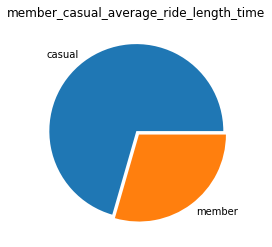

In [135]:
plt.pie(member_casual_average_ride_length_time.ride_length_in_secounds ,labels = member_casual_average_ride_length_time.index  , explode=[0,0.05])
plt.title('member_casual_average_ride_length_time')
plt.show()

In [136]:
tabel =df.pivot_table(index = 'member_casual' , columns='day_of_week',values = 'ride_length_in_secounds', aggfunc=['mean'])
tabel

mean                                         \
day_of_week              0            1            2            3   
member_casual                                                       
casual         1716.870787  2513.768595  1718.940568  1981.175743   
member          846.132484   838.459459   757.813317   963.739744   

                                                      
day_of_week              4            5            6  
member_casual                                         
casual         2181.352840  2115.056627  2511.032999  
member          938.560945  1001.229346   940.499305

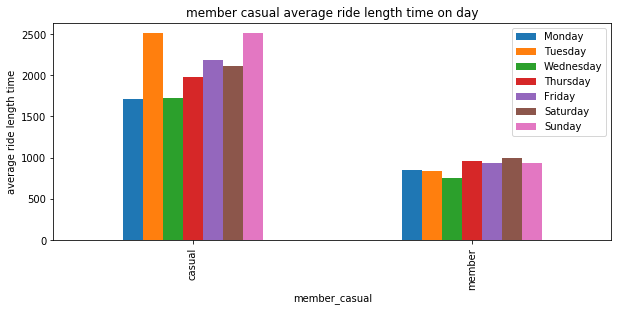

In [142]:
tabel.plot(kind = 'bar' , figsize=(10,4))
plt.title('member casual average ride length time on day')
plt.legend(['Monday','Tuesday' , 'Wednesday' , 'Thursday', 'Friday','Saturday','Sunday'])
plt.ylabel('average ride length time')
plt.show()

In [143]:
tabel2 =df.pivot_table(index = 'member_casual' , columns='day_of_week',values = 'ride_id', aggfunc=['count'])
tabel2

count                              
day_of_week       0    1    2    3    4    5    6
member_casual                                    
casual          356  363  387  404  581  830  697
member          785  851  841  780  804  811  719

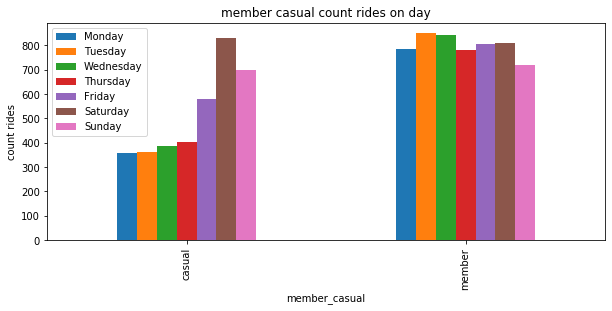

In [145]:
tabel2.plot(kind = 'bar' , figsize=(10,4))
plt.title('member casual count rides on day')
plt.legend(['Monday','Tuesday' , 'Wednesday' , 'Thursday', 'Friday','Saturday','Sunday'])
plt.ylabel('count rides')
plt.show()

In [147]:
rideable_type_count=df['rideable_type'].value_counts()
rideable_type_counts = pd.DataFrame(rideable_type_count)
rideable_type_counts

,rideable_type
docked_bike,5559
classic_bike,2363
electric_bike,1287


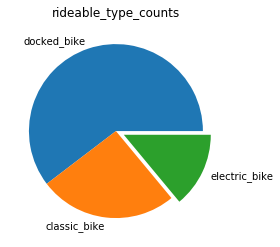

In [150]:
plt.pie(rideable_type_counts.rideable_type ,labels = rideable_type_counts.index  , explode=[0,0,0.1])
plt.title('rideable_type_counts')
plt.show()

In [161]:
tabel3 =member_casual_average_ride_length = df.groupby(['member_casual','rideable_type'])['rideable_type'].count()
member_casual_count_rideable_type = pd.DataFrame(tabel3)
member_casual_count_rideable_type

rideable_type
member_casual rideable_type               
casual        classic_bike             793
              docked_bike             2266
              electric_bike            559
member        classic_bike            1570
              docked_bike             3293
              electric_bike            728

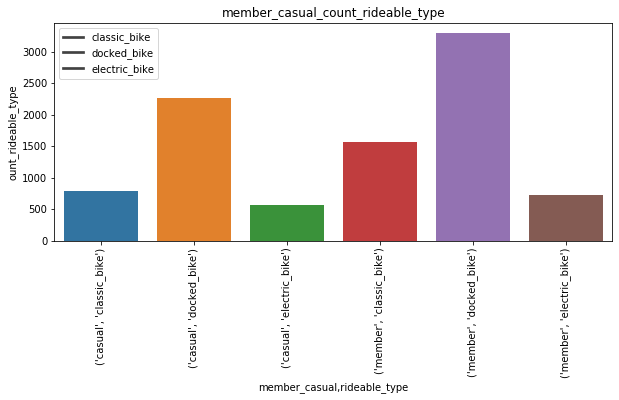

In [164]:
#member_casual_count_rideable_type.plot(kind = 'bar' , figsize=(10,4))
sns.barplot(data=member_casual_count_rideable_type,x=member_casual_count_rideable_type.index , y= member_casual_count_rideable_type.rideable_type)
plt.xticks(rotation=90)
plt.title('member_casual_count_rideable_type')
plt.legend(['classic_bike','docked_bike' , 'electric_bike'])
plt.ylabel('ount_rideable_type')
plt.show()

In [174]:
start_station_name_count=df['start_station_name'].value_counts().sort_values(ascending = False)
start_station_name_counts = pd.DataFrame(start_station_name_count)
start_station_name_counts

,start_station_name
Streeter Dr & Grand Ave,126
Lake Shore Dr & North Blvd,96
Theater on the Lake,92
Clark St & Elm St,86
Lake Shore Dr & Monroe St,78
...,...
Damen Ave & 59th St,1
Evanston Civic Center,1
Ashland Ave & Pershing Rd,1
Fairfield Ave & Roosevelt Rd,1


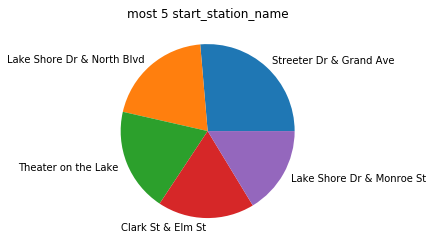

In [175]:
plt.pie(start_station_name_counts.head(5).start_station_name ,labels = start_station_name_counts.head(5).index)
plt.title('most 5 start_station_name')
plt.show()

In [176]:
end_station_name_count=df['end_station_name'].value_counts().sort_values(ascending = False)
end_station_name_counts = pd.DataFrame(end_station_name_count)
end_station_name_counts

,end_station_name
Streeter Dr & Grand Ave,123
Millennium Park,89
Clark St & Elm St,81
Broadway & Barry Ave,81
Wells St & Concord Ln,80
...,...
Wentworth Ave & 63rd St,1
Malcolm X College,1
California Ave & Lake St,1
Eggleston Ave & 69th St (*),1


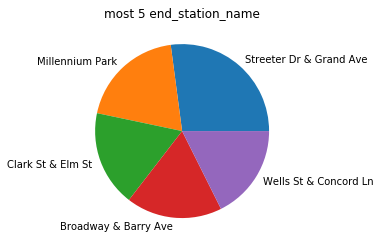

In [178]:
plt.pie(end_station_name_counts.head(5).end_station_name ,labels = end_station_name_counts.head(5).index)
plt.title('most 5 end_station_name')
plt.show()

In [179]:
df_member = df[df['member_casual']=='member']
df_casual = df[df['member_casual']=='casual']

# Why would casual riders buy Cyclistic annual memberships

This depends on the number of trips a day the user makes during the week. The more trips the user has, the faster he becomes a member

# How can Cyclistic use digital media to influence casual riders to become members

Yes, if we could know the number of weekly trips for each person, we could target him through advertisements and offers until he becomes a member

In [165]:
df.to_csv('finalUpdate_tripdata_new.csv')